# STROKE PREDICTION ANALYSIS BY OGUNNIYI DAVID
# B1102372

# Installing necessary libraries

In [3]:
!pip3 install imblearn
!pip3 install tensorflow

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()
style.use('fivethirtyeight')
import warnings  
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, precision_score, classification_report 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

import tensorflow as tf

Importing the dataset

In [5]:
df_Stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_Stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
# checking the shape of the data

df_Stroke.shape

(5110, 12)

In [7]:
# checking the data types of the data attributes

df_Stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# Statistics understanding of the data attributes

df_Stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
#checking for missing values
df_Stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
#missing values in bmi, replacing the missing values with the mean value of bmi
df_Stroke=df_Stroke.fillna(np.mean(df_Stroke['bmi']))
df_Stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# noticed some patients body mass index is greater than 50 which i think is not realistic
outliers_in_bmi=df_Stroke.loc[df_Stroke['bmi']>50]      # checking for bmi greater than 50
outliers_in_bmi['bmi'].shape

(79,)

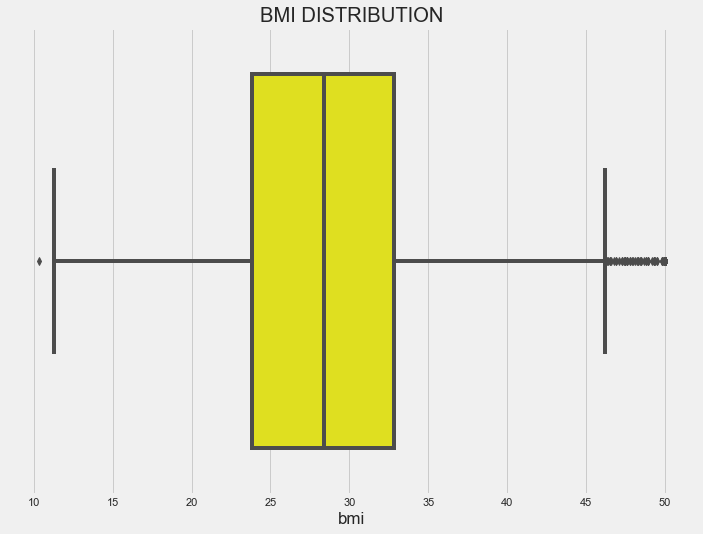

In [12]:
# the mean value of bmi is 28.9, so we replace bmi greater than 50 with 28.9
df_Stroke["bmi"] = df_Stroke["bmi"].apply(lambda a: 50 if a>50 else a)
df_Stroke["bmi"] = df_Stroke["bmi"].fillna(28.9)

# using boxplot to display the distribution of BMI
plt.figure(figsize=(11,8))
sns.boxplot(data=df_Stroke,x=df_Stroke["bmi"],color='yellow').set_title('BMI DISTRIBUTION');

# EDA

Text(0.5, 1.0, 'AGE DISTRIBUTION')

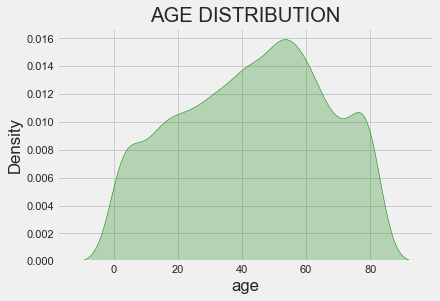

In [13]:
# EDA to understand our dataset better
# starting with age distribution 
sns.kdeplot(df_Stroke['age'], shade=True, color="green").set_title('AGE DISTRIBUTION')

From the chart, most of our patients are between the age of 40-60.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Text(0.5, 1.0, 'GENDER DISTRIBUTION')

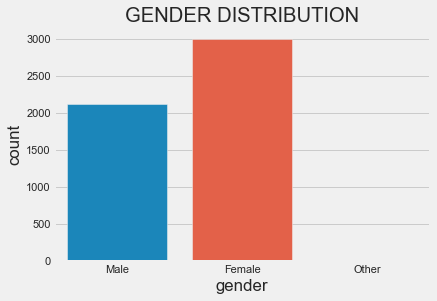

In [14]:
# next is gender distribution
print(df_Stroke.gender.value_counts())
sns.countplot(df_Stroke['gender']).set_title('GENDER DISTRIBUTION')

 From the chart above, we have more females than males on our dataset
 we have 2994 females and 2115 males 

0    4612
1     498
Name: hypertension, dtype: int64


Text(0.5, 1.0, 'HYPERTENSION DISTRIBUTION')

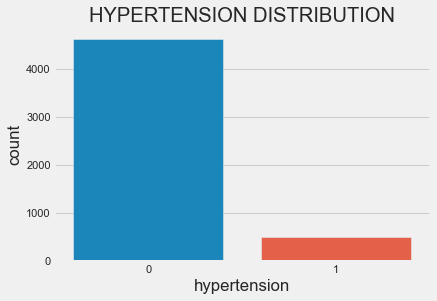

In [15]:
# hypertension distribution
print(df_Stroke.hypertension.value_counts())
sns.countplot(df_Stroke['hypertension']).set_title('HYPERTENSION DISTRIBUTION')

 from the chart above, 4612 people are not hypertensive while 498 are hypertensive

0    4834
1     276
Name: heart_disease, dtype: int64


Text(0.5, 1.0, 'HEART DISEASE DISTRIBUTION')

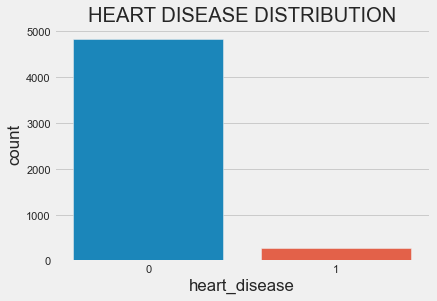

In [16]:
# heart disease distribution
print(df_Stroke.heart_disease.value_counts())
sns.countplot(df_Stroke['heart_disease']).set_title('HEART DISEASE DISTRIBUTION')

 from the chart above, 276 people have heart disease while 4834 does not

Yes    3353
No     1757
Name: ever_married, dtype: int64


Text(0.5, 1.0, 'EVER MARRIED DISTRIBUTION')

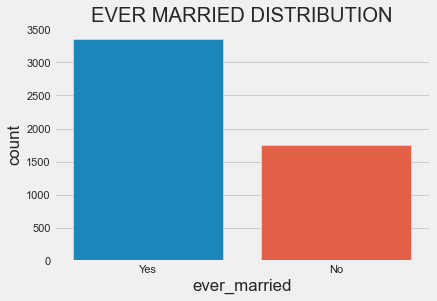

In [17]:
# ever married distribution
print(df_Stroke.ever_married.value_counts())
sns.countplot(df_Stroke['ever_married']).set_title('EVER MARRIED DISTRIBUTION')

 from the chart above, 3353 people on our dataset have married before or still married while 1757 have not 

Text(0.5, 1.0, 'Average glucose level distribution')

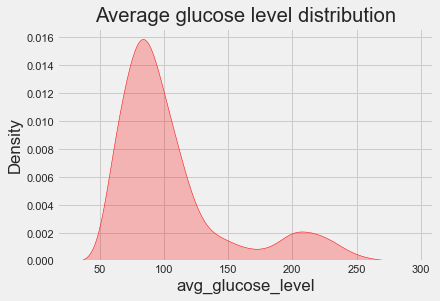

In [18]:
# average glucose level distribution 
sns.kdeplot(df_Stroke['avg_glucose_level'], shade=True, color="red").set_title('Average glucose level distribution')

 Stroke distribution

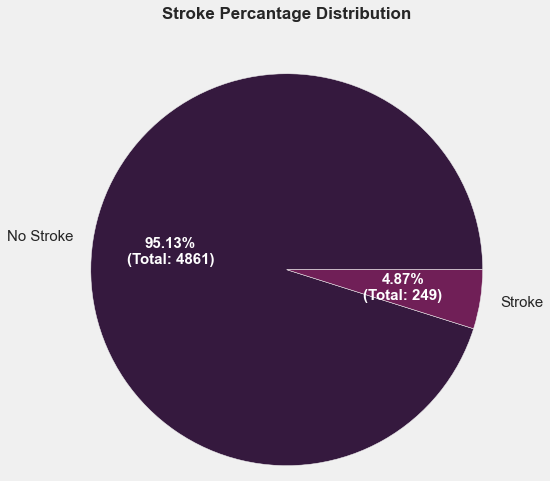

In [19]:
stroke_counts = df_Stroke['stroke'].value_counts()

fig, ax = plt.subplots(figsize =(9, 7))
_, _, autotexts = ax.pie(x=stroke_counts, labels=['No Stroke', 'Stroke'], radius=1.2,
                         autopct=lambda p: '{:.2f}%\n(Total: {:.0f})'.format(p,(p/100)*len(df_Stroke)),
                         colors=sns.color_palette("rocket"), textprops=dict(fontsize=15))

ax.set_title('Stroke Percantage Distribution', y=1.1, weight='bold', fontsize=17)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

 it is clear from the chart above that 95.1% of people on the dataset does not have stroke 
 while 4.9% of them does

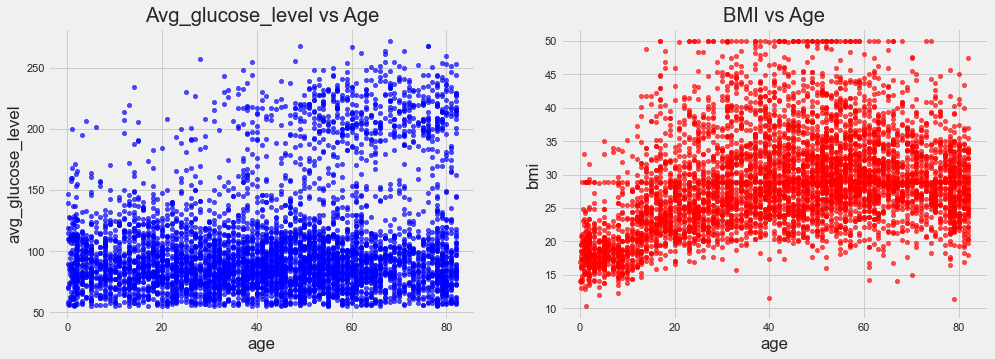

In [20]:
# is there a relationship between age and average glucose level, also bmi and age
# Let's find out
fig, pos = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_Stroke.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.7, color='blue', ax=pos[0], title="Avg_glucose_level vs Age")
df_Stroke.plot(kind='scatter', x='age', y='bmi', alpha=0.7, color='red', ax=pos[1], title="BMI vs Age")
plt.show()

From the figure above, the average glucose level is high for old people
Now let's do EDA to find out have attributes/columns affect or influence having stroke
Starting with age

# Influence on stroke eda

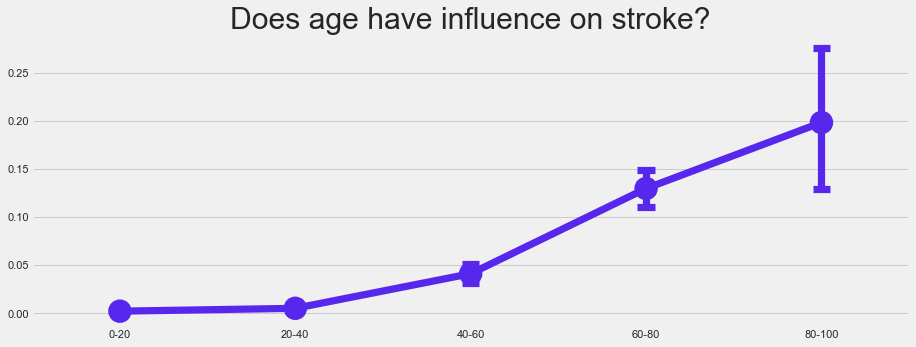

In [21]:
def plot_age(df_Stroke, column_name):

    age_data = df_Stroke[[column_name, 'stroke']]
    age_data[column_name] = pd.cut(age_data[column_name],
                               bins=[0, 20, 40, 60, 80, 100],
                               labels=['0-20',
                                       '20-40',
                                       '40-60',
                                       '60-80',
                                       '80-100'])

    
    plt.figure(figsize=(14, 5))
    plot = sns.pointplot(x=column_name, y='stroke',
                  dodge=0.1, capsize=.1, data=age_data, color="#5727ed")
    plot.set_title(f'Does {column_name} have influence on stroke?', fontsize=30)
    plot.set(xlabel=None, ylabel=None)


plot_age(df_Stroke, 'age')

From the chart above, we can see age does have influence on a patient having stroke.
The higher your age, the higher the probability of having stroke.
Next is Hypertension.

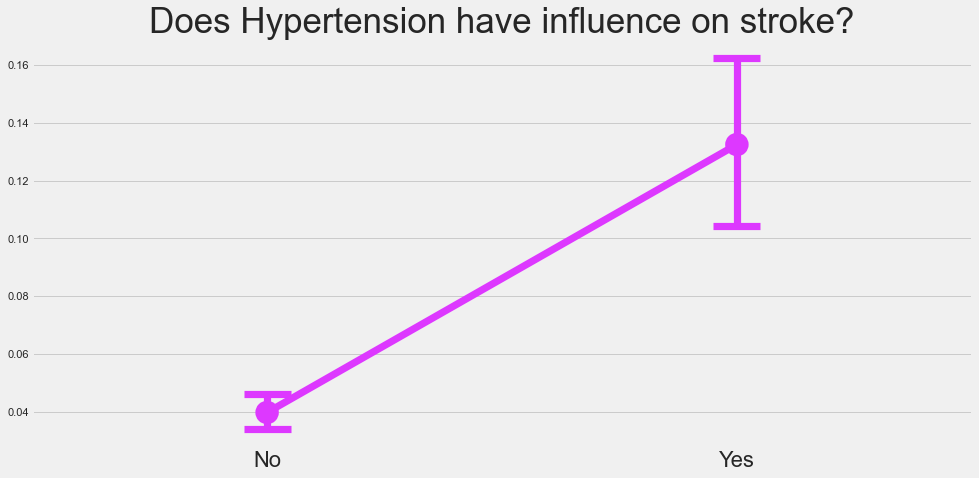

In [22]:
def plot_hyper(df_Stroke, column_name):

    hypertension_data = df_Stroke[[column_name, 'stroke']]

    
    plt.figure(figsize=(15, 7))
    hypertension = sns.pointplot(x=column_name, y='stroke',
                           dodge=0.1, capsize=.1,
                           data=hypertension_data,
                           color='#dd38ff')
    hypertension.set_title('Does Hypertension have influence on stroke?',
                            fontsize=35)
    hypertension.set(xlabel=None, ylabel=None)
    hypertension.set_xticklabels(['No', 'Yes'], size=22)


plot_hyper(df_Stroke, 'hypertension')

From the chart above, we can conclude having hypertension increases the probability of having stroke.

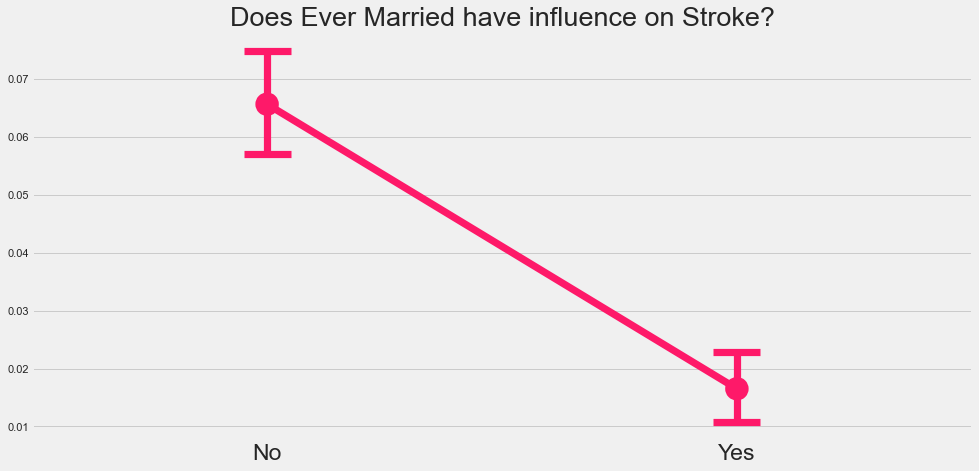

In [23]:
def plot_married(df_Stroke, column_name):

    married_data = df_Stroke[[column_name, 'stroke']]

    plt.figure(figsize=(15, 7))
    married = sns.pointplot(x=column_name, y='stroke',
                            dodge=0.1, capsize=.1,
                            data=married_data,
                            color='#fe1969')
    married.set_title('Does Ever Married have influence on Stroke?', fontsize=27)
    married.set(xlabel=None, ylabel=None)
    married.set_xticklabels(['No', 'Yes'], size=23)


plot_married(df_Stroke, 'ever_married')

From the chart above, we can see being ever married doesnt have influence in a patient having stroke

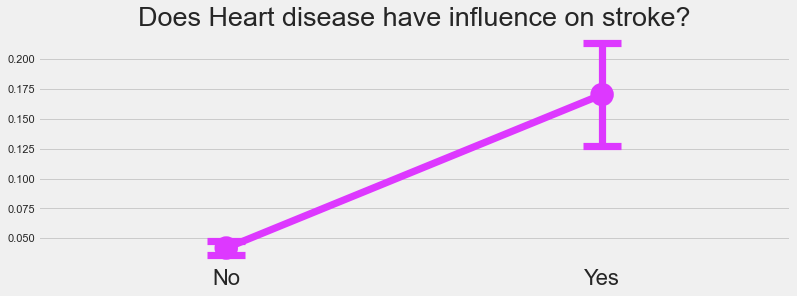

In [24]:
def plot_heart(df_Stroke, column_name):

    heartdisease_data = df_Stroke[[column_name, 'stroke']]

    
    plt.figure(figsize=(12, 4))
    heartdisease = sns.pointplot(x=column_name, y='stroke',
                           dodge=0.1, capsize=.1,
                           data=heartdisease_data,
                           color='#dd38ff')
    heartdisease.set_title('Does Heart disease have influence on stroke?',
                            fontsize=27)
    heartdisease.set(xlabel=None, ylabel=None)
    heartdisease.set_xticklabels(['No', 'Yes'], size=22)


plot_heart(df_Stroke, 'heart_disease')

From the chart above, we can see having heart disease does have a big influence on a patient having stroke.

[Text(0, 0, 'formerly smoked'),
 Text(1, 0, 'never smoked'),
 Text(2, 0, 'smokes'),
 Text(3, 0, 'Unknown')]

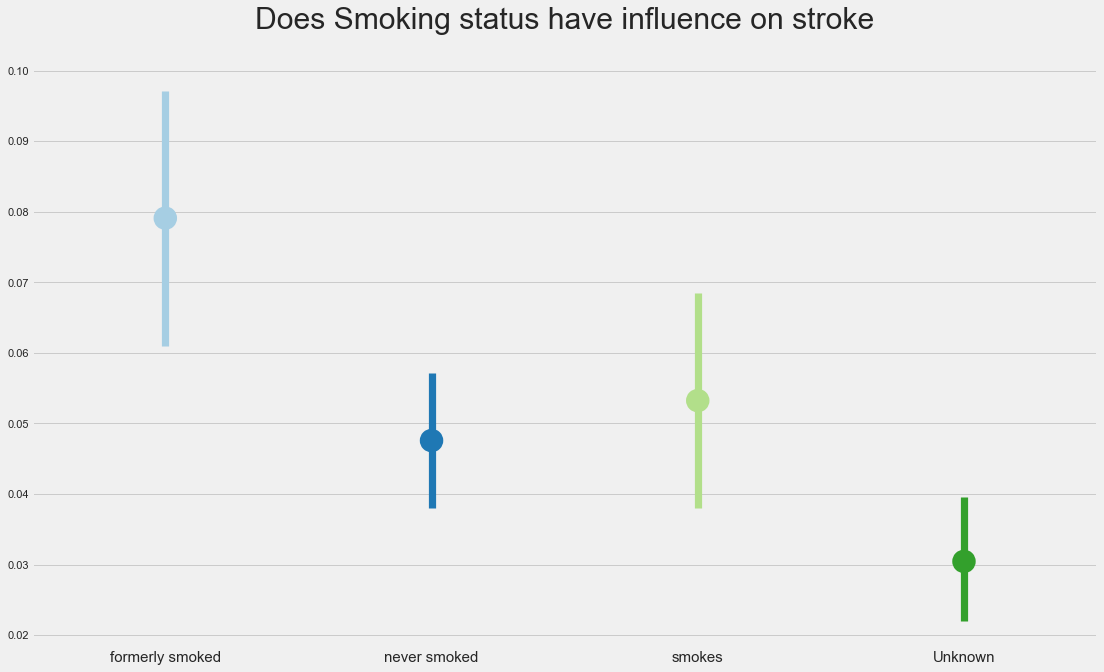

In [25]:
fig = plt.figure(figsize=(17, 10))

ax = fig.add_subplot(111)
smoke_cat = sns.pointplot(x=df_Stroke.smoking_status, y='stroke', data=df_Stroke,
             ax=ax, palette='Paired')
smoke_cat.set_title('Does Smoking status have influence on stroke',
                    fontsize=30, y=1.05)
smoke_cat.set(xlabel=None,
                   ylabel=None)
smoke_cat.set_xticklabels(smoke_cat.get_xticklabels(),size=15)



From the chart above, we can see being a smoker or a former smoker increases the probability of having stroke.


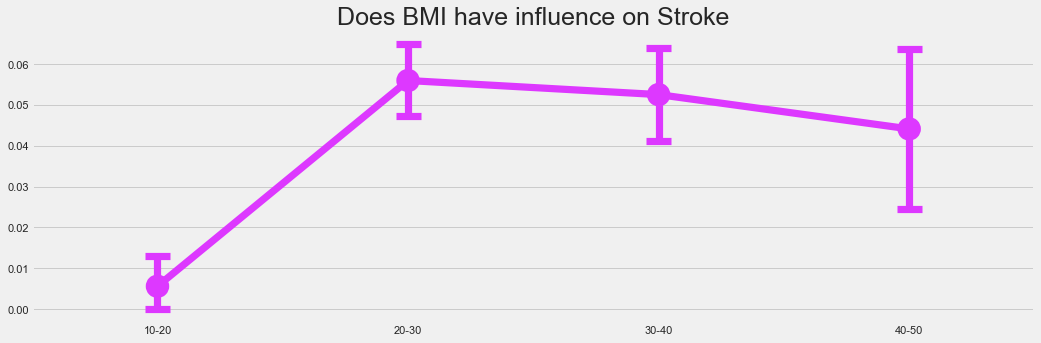

In [26]:
def plot_bmi(df_Stroke, column_name):

    bmi_data = df_Stroke[[column_name, 'stroke']]
    bmi_data[column_name] = pd.cut(bmi_data[column_name],
                               bins=[10, 20, 30, 40, 50],
                               labels=['10-20',
                                       '20-30',
                                       '30-40',
                                       '40-50',])

    
    plt.figure(figsize=(16, 5))
    plot = sns.pointplot(x=column_name, y='stroke',
                  dodge=0.1, capsize=.1, data=bmi_data, color='#dd38ff')
    plot.set_title(f'Does BMI have influence on Stroke', fontsize=25)
    plot.set(xlabel=None, ylabel=None)


plot_bmi(df_Stroke, 'bmi')

From the chart above, we can see that bmi between 10-20 does not have influence on stroke unlike 20-50.

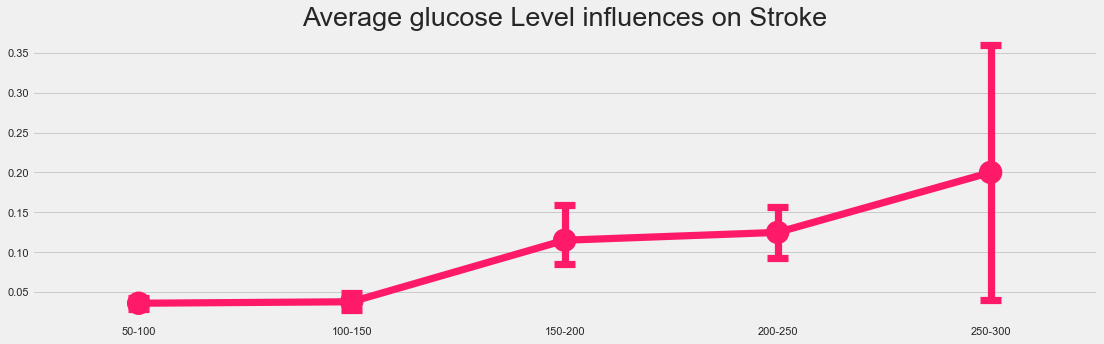

In [27]:
def plot_glucose(df_Stroke, column_name):

    avg_glucose_data = df_Stroke[[column_name, 'stroke']]
    avg_glucose_data[column_name] = pd.cut(avg_glucose_data[column_name],
                               bins=[50, 100, 150, 200, 250, 300],
                               labels=['50-100',
                                       '100-150',
                                       '150-200',
                                       '200-250',
                                       '250-300'])

    
    plt.figure(figsize=(17, 5))
    plot = sns.pointplot(x=column_name, y='stroke',
                  dodge=0.1, capsize=.1, data=avg_glucose_data, color='#fe1969')
    plot.set_title(f'Average glucose Level influences on Stroke', fontsize=27)
    plot.set(xlabel=None, ylabel=None)


plot_glucose(df_Stroke, 'avg_glucose_level')

From the chart above, we can conclude that the higher the average glucose level, the higher probability of having stroke.

<Figure size 1080x1080 with 0 Axes>

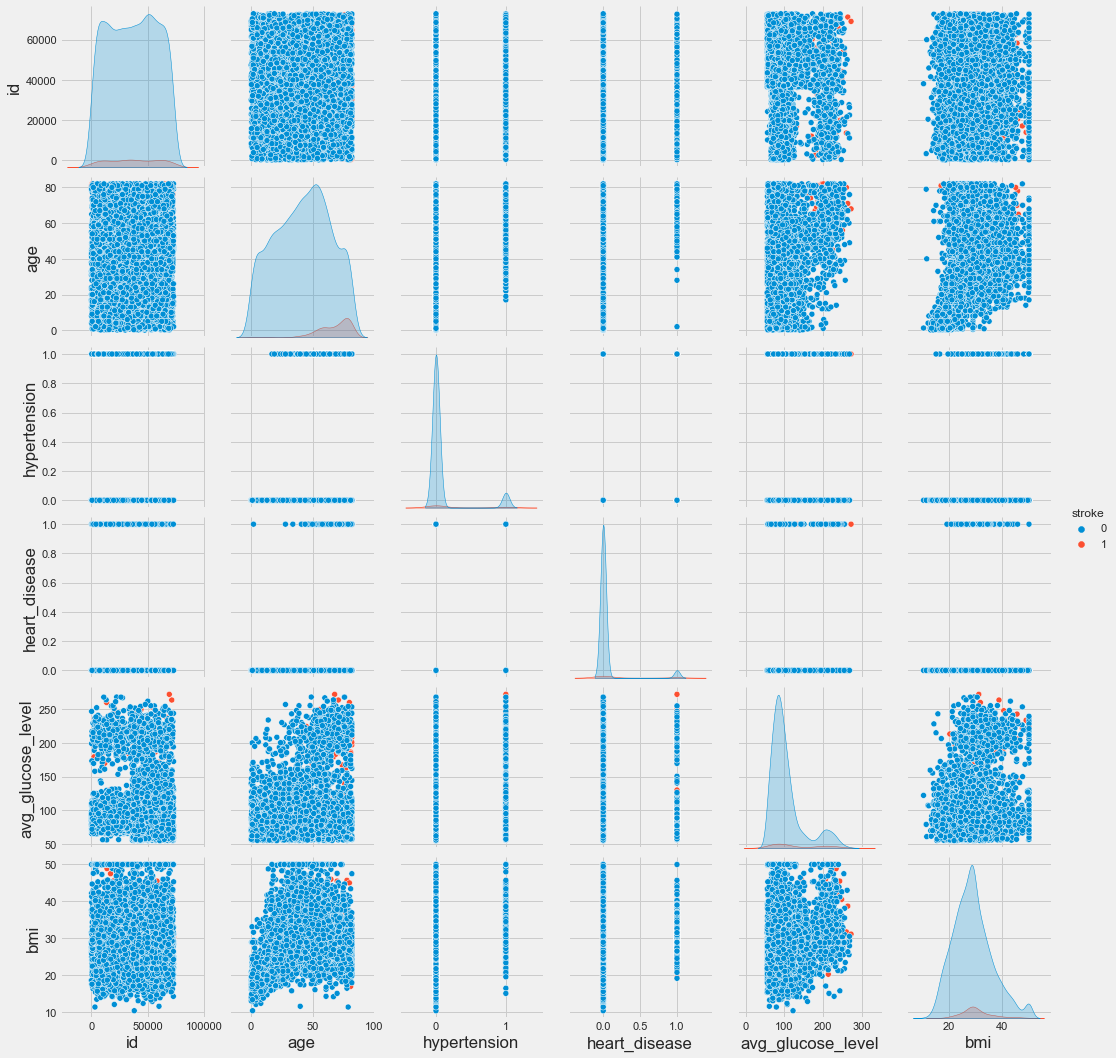

In [28]:
# Pair plot
fig = plt.figure(figsize=(15,15))
sns.pairplot(df_Stroke, hue="stroke")
plt.show()

Some columns are still in text/categorical form, so let's convert to numerical in preparation for our algorithm.This process is called mapping or label encoding

In [29]:
df_Stroke['work_type'] = df_Stroke['work_type'].map({'Never_worked':0, 
                                                     'Self-employed': 1, 'Private':2, 'Govt_job':3, 'children':4})
df_Stroke['gender'] = df_Stroke['gender'].map({'Male':0, 'Female':1})
df_Stroke['Residence_type'] = df_Stroke['Residence_type'].map({'Urban':1, 'Rural':2})
df_Stroke['smoking_status'] = df_Stroke['smoking_status'].map({'Unknown':0, 'never smoked':1, 'smokes':2, 'formerly smoked':3})
df_Stroke['ever_married'] = df_Stroke['ever_married'].map({'Yes':1, 'No':0})

# check to see how our dataset looks now after mapping
df_Stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,1,2,1,228.69,36.600000,3,1
1,51676,1.0,61.0,0,0,1,1,2,202.21,28.893237,1,1
2,31112,0.0,80.0,0,1,1,2,2,105.92,32.500000,1,1
3,60182,1.0,49.0,0,0,1,2,1,171.23,34.400000,2,1
4,1665,1.0,79.0,1,0,1,1,2,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,1,2,1,83.75,28.893237,1,0
5106,44873,1.0,81.0,0,0,1,1,1,125.20,40.000000,1,0
5107,19723,1.0,35.0,0,0,1,1,2,82.99,30.600000,1,0
5108,37544,0.0,51.0,0,0,1,2,2,166.29,25.600000,3,0


In [30]:
# Dropping id column because we do not need it.
df_Stroke = df_Stroke.drop(columns=['id'])

<AxesSubplot:>

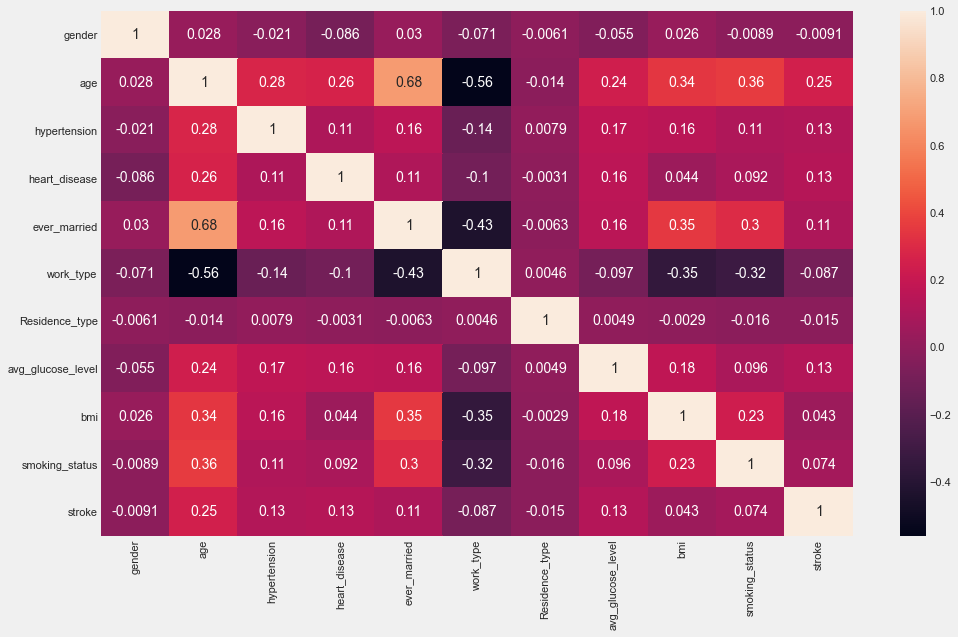

In [31]:
# Next on the agenda is Correlation matrix/heatmap, to check for correlation between variables
plt.figure(figsize=(15,9))
sns.heatmap(df_Stroke.corr(), annot=True)

From chart, Work_type is highly negative correlated to age, Ever_married, bmi and smoking_status. Age is also highly positive correlated to Ever_married. Also, Age is Positively correlated to hypertension, Heart_disease, avg_glucose_level, bmi, smoking_status and stroke.

In [32]:
# Now, we start some serious business, first we divide the dataset into Features and Label
features = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level',
            'bmi','smoking_status']

label = ['stroke']

A = df_Stroke[features]
B = df_Stroke[label]

In [33]:
# checking for missing values
A.isnull().sum()

gender               1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [34]:
# from the information above, we can see that 'Other' in gender as changed to a null value
A.gender=(A.gender.fillna(0))            # replacing the null value with 0(male)

# check again to see if the null value is still in the dataset
A.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

The Target column, which is 'Stroke' is not balance. 95% doesn't have stroke and only 5% has stroke. 
so we obvious need to treat this imbalance, or else we will end up with poor performance.
i will use SMOTE(Synthetic Minority Oversampling Technique) to treat it.
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
i will do that below

In [35]:
bal = SMOTE()
A_bal, B_bal = bal.fit_resample(A, B)

In [36]:
# checking how the target column is now distributed

B_bal.value_counts()

stroke
0         4861
1         4861
dtype: int64

In [37]:
# Next Splitting the dataset into Training and Testing
A_train,A_test, B_train,B_test=train_test_split(A_bal,B_bal,test_size=0.30,random_state=42)

In [38]:
# Since the data are in different scales, standardization is needed in features
stan=StandardScaler()

A_train = stan.fit_transform(A_train)
A_test = stan.transform(A_test)

In [39]:
# checking the data points of both features training and testing after standardization
A_train

array([[-1.24438789,  0.98422223, -0.31379373, ..., -0.23070965,
        -0.06825102, -1.22231109],
       [-1.24438789,  0.3198986 , -0.31379373, ..., -0.79103011,
        -0.21533181, -0.20221948],
       [ 0.94804516,  0.3038008 , -0.31379373, ..., -0.93884022,
        -0.77382261, -0.20221948],
       ...,
       [ 0.94804516,  1.12488383, -0.31379373, ...,  1.43253495,
        -0.95149639, -1.22231109],
       [ 0.94804516, -0.42198207, -0.31379373, ..., -0.33758356,
         3.32158037,  0.81787213],
       [ 0.70679537,  0.6467264 , -0.31379373, ..., -0.77011021,
        -0.84643489,  1.83796373]])

In [40]:
A_test

array([[ 0.94804516, -2.19107781, -0.31379373, ..., -0.54751447,
        -1.91411129, -1.22231109],
       [-1.24438789,  0.85316855, -0.31379373, ..., -0.83059528,
         0.3075681 ,  0.81787213],
       [-1.24438789,  0.48524651, -0.31379373, ..., -0.28560067,
         0.60737212, -0.20221948],
       ...,
       [-1.24438789, -1.14776494, -0.31379373, ..., -1.00518202,
        -0.21170848, -0.20221948],
       [ 0.94804516,  0.71205366, -0.31379373, ..., -0.46245156,
         0.86433858, -0.20221948],
       [-0.5996892 ,  0.30115196, -0.31379373, ..., -0.13036671,
        -0.08682227,  0.81787213]])

# LOGISTIC REGRESSION

Training Accuracy: 81.05804555473917
The AUC Score:  81.417060764754
Testing Accuracy: 81.41926636955776
Precision score: 80.15768725361366
Recall score: 83.56164383561644
F1 score: 80.15768725361366


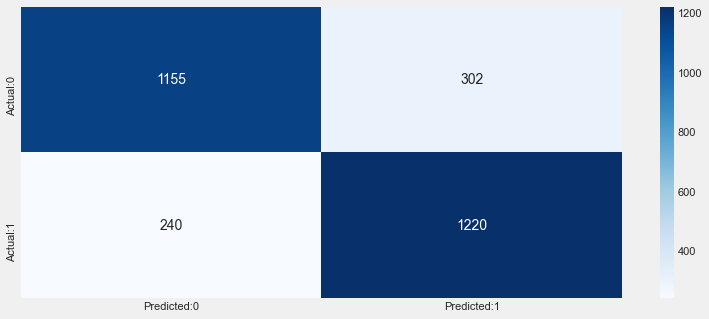

In [41]:
# First model we will use is Logistic Regression

logistic_reg = LogisticRegression()
logistic_reg.fit(A_train,B_train)

# The training accuracy 
log_tran = logistic_reg.score(A_train, B_train)
print('Training Accuracy:', log_tran*100)

# Predicting / Testing

B_pred_logistic_reg = logistic_reg.predict(A_test)
B_pred_logistic_reg

# The AUC (Area Under the Curve) of the Logistic Model

Auc_lr = roc_auc_score(B_test, B_pred_logistic_reg)
print('The AUC Score: ', Auc_lr*100)

# The Accuracy score

Log_acc = accuracy_score(B_test, B_pred_logistic_reg)
print('Testing Accuracy:', Log_acc*100)

# The Precision score 
Log_pre = precision_score(B_test, B_pred_logistic_reg)
print('Precision score:', Log_pre*100)

# The Recall score 
Log_rec = recall_score(B_test, B_pred_logistic_reg)
print('Recall score:', Log_rec*100)

# The F1 score 
Log_f1 = precision_score(B_test, B_pred_logistic_reg)
print('F1 score:', Log_f1*100)

# Next, the confusion matrix for the LR model 

conf_mat = confusion_matrix(B_test, B_pred_logistic_reg)

plt.figure(figsize=(12,5))

con_matrix = pd.DataFrame(data=conf_mat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix, annot=True,fmt='d',cmap="Blues");



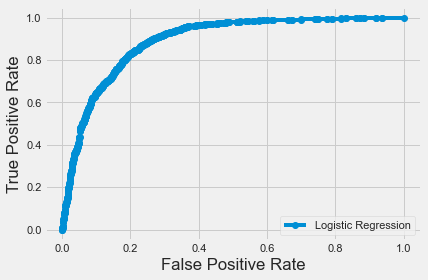

In [42]:
# from the operation above, TN = 1155  FP = 302  FN = 240  and  TP = 1220.
# Next is getting the False Positive rate and True Positive rate

predicted_prob_logistic = logistic_reg.predict_proba(A_test)
predicted_prob_logistic = predicted_prob_logistic[:, 1]
Fpr, Tpr, _ = roc_curve(B_test, predicted_prob_logistic)


# Next plotting the ROC curve of the LR model


plt.plot(Fpr, Tpr, marker='o', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

 The logistic Regression model gave us accuracy score of 81.42% and also from the Roc curve, Logistic regression is good 
 for predicting stroke but is it the best model though, Let's find out by trying other models.

# RANDOM FOREST

Training Accuracy: 100.0
AUC score: 94.41230808284992
Testing Accuracy score: 94.41206719232088
Precision score: 94.63179628355127
Recall score: 94.17808219178082
F1 score: 94.63179628355127


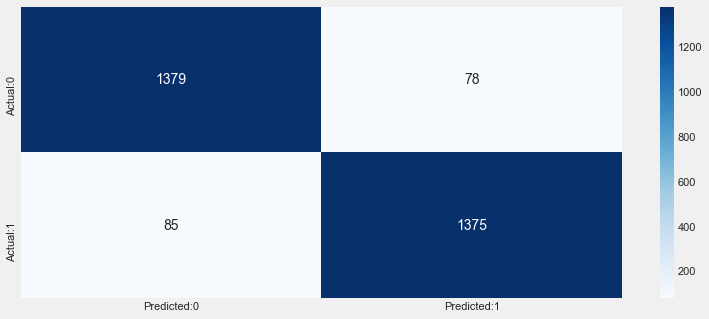

In [43]:
# The next model is Random Forest Model which according to research is the best for stroke prediction

rand_forest = RandomForestClassifier()
rand_forest.fit(A_train, B_train)

# The training accuracy 

rand_tran = rand_forest.score(A_train, B_train)
print('Training Accuracy:', rand_tran*100)

# Predicting for Random forest Model

B_pred_rand_forest = rand_forest.predict(A_test)
B_pred_rand_forest

# The AUC (Area Under the Curve) of Random Forest Model

Auc_rand = roc_auc_score(B_test, B_pred_rand_forest)
print('AUC score:', Auc_rand*100)

# The Accuracy score of the Random forest model

rand_acc = accuracy_score(B_test, B_pred_rand_forest)
print('Testing Accuracy score:', rand_acc*100)

# The Precision score 
rand_pre = precision_score(B_test, B_pred_rand_forest)
print('Precision score:', rand_pre*100)

# The Recall score 
rand_rec = recall_score(B_test, B_pred_rand_forest)
print('Recall score:', rand_rec*100)

# The F1 score 
rand_f1 = precision_score(B_test, B_pred_rand_forest)
print('F1 score:', rand_f1*100)

# Next, the confusion matrix for the Random forest model 

conf_mat_rand = confusion_matrix(B_test, B_pred_rand_forest)

plt.figure(figsize=(12,5))

con_matrix3 = pd.DataFrame(data=conf_mat_rand,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix3, annot=True,fmt='d',cmap="Blues");



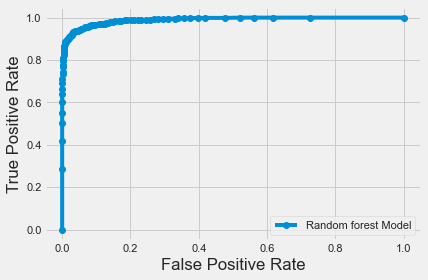

In [44]:
# from the operation above, TN = 1379  FP = 78  FN = 85  and  TP = 1375.
# Next is getting the False Positive rate and True Positive rate for Random forest model

predicted_prob_rand = rand_forest.predict_proba(A_test)
predicted_prob_rand = predicted_prob_rand[:, 1]
Fpr3, Tpr3, _ = roc_curve(B_test, predicted_prob_rand)

# Next plotting the ROC curve of the Random forest model


plt.plot(Fpr3, Tpr3, marker='o', label='Random forest Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

 The accuracy score of the Random forest model is 94.4%, which is higher than logistic regression.
 The Auc score is also higher than LR.

# KNN

Training Accuracy: 91.9911829537105
AUC score: 88.13206908547306
Testing Accuracy score: 88.13849845731916
Precision score: 83.92204628501827
Recall score: 94.3835616438356
F1 score: 83.92204628501827


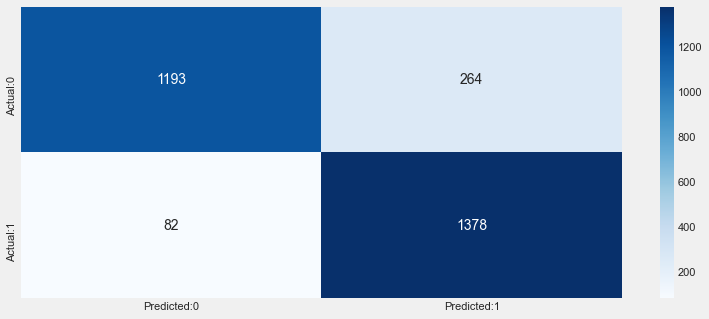

In [45]:
# The last model is KNN

from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(A_train, B_train)

# The training accuracy 

knn_tran = Knn_model.score(A_train, B_train)
print('Training Accuracy:', knn_tran*100)

# Predicting for KNN Model

B_pred_Knn_model = Knn_model.predict(A_test)
B_pred_Knn_model

# The AUC (Area Under the Curve) of KNN Model

Auc_knn = roc_auc_score(B_test, B_pred_Knn_model)
print('AUC score:', Auc_knn*100)

# The Accuracy score of the KNN model

Knn_acc = accuracy_score(B_test, B_pred_Knn_model)
print('Testing Accuracy score:', Knn_acc*100)

# The Precision score 
Knn_pre = precision_score(B_test, B_pred_Knn_model)
print('Precision score:', Knn_pre*100)

# The Recall score 
Knn_rec = recall_score(B_test, B_pred_Knn_model)
print('Recall score:', Knn_rec*100)

# The F1 score 
Knn_f1 = precision_score(B_test, B_pred_Knn_model)
print('F1 score:', Knn_f1*100)

# Next, the confusion matrix for the KNN model 

conf_mat_knn = confusion_matrix(B_test, B_pred_Knn_model)

plt.figure(figsize=(12,5))

con_matrix4 = pd.DataFrame(data=conf_mat_knn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix4, annot=True,fmt='d',cmap="Blues");




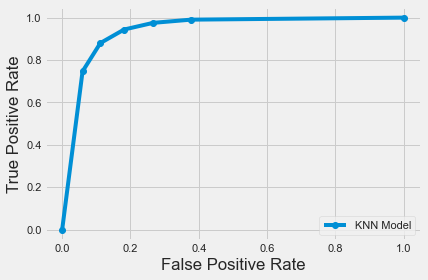

In [46]:
# from the operation above, TN = 1193  FP = 264  FN = 82  and  TN = 1378.
# Next is getting the False Positive rate and True Positive rate for KNN model

predicted_prob_knn = Knn_model.predict_proba(A_test)
predicted_prob_knn = predicted_prob_knn[:, 1]
Fpr4, Tpr4, _ = roc_curve(B_test, predicted_prob_knn)

# Next plotting the ROC curve of the KNN model


plt.plot(Fpr4, Tpr4, marker='o', label='KNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The accuracy score of the KNN model is 88.14% which is good.

# Multilayer Perceptrons Neural Network

We are using MLP classifier with hidden layer sizes of 1000, 300,300,300 and solver = "adam", tol = 0.0001 and shuffle is False

Iteration 1, loss = 0.43606117
Iteration 2, loss = 0.36130366
Iteration 3, loss = 0.32930841
Iteration 4, loss = 0.30913664
Iteration 5, loss = 0.30382900
Iteration 6, loss = 0.27986451
Iteration 7, loss = 0.26648479
Iteration 8, loss = 0.27867957
Iteration 9, loss = 0.25323147
Iteration 10, loss = 0.22763917
Iteration 11, loss = 0.24055580
Iteration 12, loss = 0.21408001
Iteration 13, loss = 0.21395195
Iteration 14, loss = 0.21951896
Iteration 15, loss = 0.21568052
Iteration 16, loss = 0.19047100
Iteration 17, loss = 0.18385939
Iteration 18, loss = 0.23113491
Iteration 19, loss = 0.19097805
Iteration 20, loss = 0.18085123
Iteration 21, loss = 0.21254677
Iteration 22, loss = 0.19297321
Iteration 23, loss = 0.19654483
Iteration 24, loss = 0.17597447
Iteration 25, loss = 0.18800504
Iteration 26, loss = 0.19364545
Iteration 27, loss = 0.18736119
Iteration 28, loss = 0.20449064
Iteration 29, loss = 0.15629154
Iteration 30, loss = 0.14375882
Iteration 31, loss = 0.13395246
Iteration 32, los

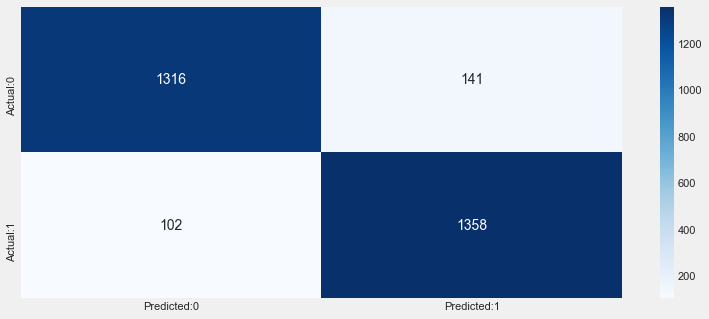

In [47]:
Mlp_nn = MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)

#predicting
Mlp_nn.fit(A_train, B_train)
Mlp_nn_pred= Mlp_nn.predict(A_test)

# Training Accuracy
Mlp_tran = Mlp_nn.score(A_train, B_train)
print('Training Accuracy:', Mlp_tran*100)

# The Accuracy score of the MLP NN model

Mlp_acc = accuracy_score(B_test, Mlp_nn_pred)
print('Testing Accuracy score:', Mlp_acc*100)

# The AUC (Area Under the Curve) of the Model

Mlp_auc = roc_auc_score(B_test, Mlp_nn_pred)
print('AUC score:', Mlp_auc*100)

# The Precision score 
Mlp_pre = precision_score(B_test, Mlp_nn_pred)
print('Precision score:', Mlp_pre*100)

# The Recall score 
Mlp_rec = recall_score(B_test, Mlp_nn_pred)
print('Recall score:', Mlp_rec*100)

# The F1 score 
Mlp_f1 = precision_score(B_test, Mlp_nn_pred)
print('F1 score:', Mlp_f1*100)

# Next, the confusion matrix for the MLP NN model 

conf_mat_Mlp = confusion_matrix(B_test, Mlp_nn_pred)

plt.figure(figsize=(12,5))

con_matrix5 = pd.DataFrame(data=conf_mat_Mlp,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix5, annot=True,fmt='d',cmap="Blues");



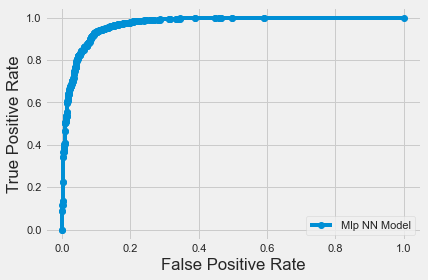

In [48]:
# from the operation above, TN = 1316  FP = 141  FN = 102  and  TN = 1358.
# Next is getting the False Positive rate and True Positive rate for MLP NN model

predicted_prob_Mlp = Mlp_nn.predict_proba(A_test)
predicted_prob_Mlp = predicted_prob_Mlp[:, 1]
Fpr5, Tpr5, _ = roc_curve(B_test, predicted_prob_Mlp)

# Next plotting the ROC curve of the KNN model


plt.plot(Fpr5, Tpr5, marker='o', label='Mlp NN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The accuracy score of the MLP NN model is 91.67% which is great.

# ARTIFICIAL NEURAL NETWORK

Epoch 1/60
213/213 [==============================] - 1s 825us/step - loss: 0.6981 - accuracy: 0.5681
Epoch 2/60
213/213 [==============================] - 0s 824us/step - loss: 0.5842 - accuracy: 0.7415
Epoch 3/60
213/213 [==============================] - 0s 812us/step - loss: 0.5347 - accuracy: 0.7891
Epoch 4/60
213/213 [==============================] - 0s 804us/step - loss: 0.5056 - accuracy: 0.7993
Epoch 5/60
213/213 [==============================] - 0s 786us/step - loss: 0.4857 - accuracy: 0.8054
Epoch 6/60
213/213 [==============================] - 0s 805us/step - loss: 0.4664 - accuracy: 0.8075
Epoch 7/60
213/213 [==============================] - 0s 795us/step - loss: 0.4434 - accuracy: 0.8103
Epoch 8/60
213/213 [==============================] - 0s 804us/step - loss: 0.4314 - accuracy: 0.8107
Epoch 9/60
213/213 [==============================] - 0s 795us/step - loss: 0.4254 - accuracy: 0.8148
Epoch 10/60
213/213 [==============================] - 0s 763us/step - loss: 0.421

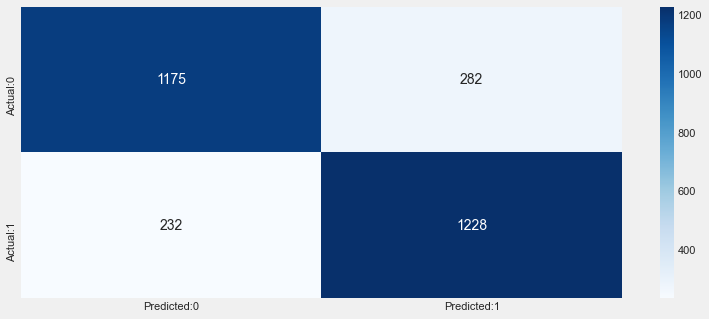

In [49]:
Ann = tf.keras.models.Sequential()

# adding 6 units to the first layer with activation function of relu
Ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# adding 1 unit to the second layer with activation function of sigmoid
Ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# next is compiling with Adam optimizer and binary crossentropy loss 
Ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# building the ANN with 60 Epochs
Ann.fit(A_train, B_train, batch_size = 32, epochs = 60)

#predicting
Ann_B_pred = Ann.predict(A_test)
Ann_B_pred = (Ann_B_pred > 0.5)


# The Accuracy score of the ANN model

Ann_acc = accuracy_score(B_test, Ann_B_pred)
print('Testing Accuracy score:', Ann_acc*100)

# The AUC (Area Under the Curve) of the Model

Ann_auc = roc_auc_score(B_test, Ann_B_pred)
print('AUC score:', Ann_auc*100)

# The Precision score 
Ann_pre = precision_score(B_test, Ann_B_pred)
print('Precision score:', Ann_pre*100)

# The Recall score 
Ann_rec = recall_score(B_test, Ann_B_pred)
print('Recall score:', Ann_rec*100)

# The F1 score 
Ann_f1 = precision_score(B_test, Ann_B_pred)
print('F1 score:', Ann_f1*100)

# Next, the confusion matrix for the ANN model 

conf_mat_Ann = confusion_matrix(B_test, Ann_B_pred)

plt.figure(figsize=(12,5))

con_matrix6 = pd.DataFrame(data=conf_mat_Ann,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix6, annot=True,fmt='d',cmap="Blues");

Ann_B_pred = np.round(Ann_B_pred).astype(int)

The accuracy score of the ANN model is 82.38%.

# COMPARING THE  MODELS

In [50]:
# creating a table for the models accuracy
model_results = pd.DataFrame([["Logistic Regression",Log_acc*100,Auc_lr*100,Log_pre*100,Log_rec*100,Log_f1*100],
                              [" ANN",Ann_acc*100,Ann_auc*100,Ann_pre*100,Ann_rec*100,Ann_f1*100],
                              ["MLP NN",Mlp_acc*100,Mlp_auc*100,Mlp_pre*100,Mlp_rec*100,Mlp_f1*100],
                              ["Random Forest",rand_acc*100,Auc_rand*100,rand_pre*100,rand_rec*100,rand_f1*100],
                              ["K-Nearest Neighbor",Knn_acc*100,Auc_knn*100,Knn_pre*100,Knn_rec*100,Knn_f1*100]],
                             columns = ["Models","Accuracy Score","Auc Score","Precision Score","Recall Score", 
                                       "F1 Score"]).sort_values(by='Accuracy Score',ascending=False)


model_results.style.background_gradient(cmap='Blues')

,Models,Accuracy Score,Auc Score,Precision Score,Recall Score,F1 Score
3,Random Forest,94.412067,94.412308,94.631796,94.178082,94.631796
2,MLP NN,91.669523,91.668140,90.593729,93.013699,90.593729
4,K-Nearest Neighbor,88.138498,88.132069,83.922046,94.383562,83.922046
1,ANN,82.379157,82.377375,81.324503,84.109589,81.324503
0,Logistic Regression,81.419266,81.417061,80.157687,83.561644,80.157687


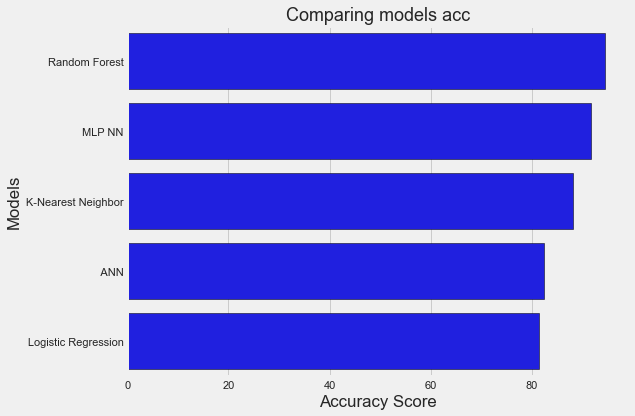

In [51]:
# Accuracy comparison

fig, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes('pastel')
sns.barplot(y ='Models', x ='Accuracy Score', data = model_results, color='blue', edgecolor='black')
plt.title('Comparing models acc', fontsize=18)
plt.show()

# conclusion

From the Experiment done, Random Forest gave us the highest accuracy (94.4%) with MLP neural network closely behind with 91.7%. Logistic Regression gave us the lowest accuracy out of the five with 81.4% accuracy. Also, Random Forest gave us the highest Auc score, Precision score and f1 score But KNN gave us the highest Recall score. While logistic regression gave us the lowest score for all.
Based on this, we can conclude that for stroke prediction, Random Forest is the best algorithm 